In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go


In [3]:
def get_bs_call(T,r,d,S,K,sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    print(call)
    return call
    

In [4]:
# Price of Put Option
def get_put(T, r, d, S, K, sigma):
    if d == 0:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        put = K*np.exp(-r*T)*norm.cdf(-1*d2) - S*norm.cdf(-1*d1)
        print(put)
        return put
    elif d < 0:
        print('Not a valid dividend input')
    else:
        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)

        put = K*np.exp(-r*T)*norm.cdf(-1*d2) - np.exp(-d*T)*S*norm.cdf(-1*d1)
        print(put)
        return put

In [5]:
# Pricing of Digital Call
def get_dig_call(T, r, d, S, K, sigma):

    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    dig_call = np.exp(-r*T)*norm.cdf(d2)
    print(dig_call)
    return dig_call

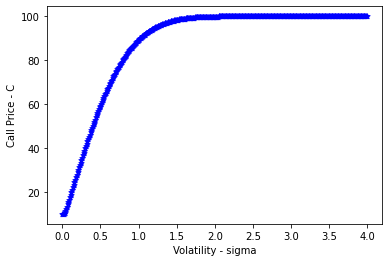

When vol is small call price is small, when vol big call price big, but flattens out after around sigma = 2 (200%IV) see graph for curvature


In [6]:
# How Black Scholes CALL varies as a function of vol change K for OTM ATM or ITM strikes
x=1
sigma_list=[]
call_list=[]

# Make a list of randomly generated parameters and call price
i=0.0001
for x in range(1,1000):
    if i < 4:
        T = 10
        r= 0.02
        d= 0
        K= 110
        S = 100
        sigma = i
        sigma_list.append(sigma)

    #   Calculate price of call option and add to call list

        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        call_list.append(call)
        i=i+0.01
    else:
        break


#Plot strike against call price to visually see monotone decreasing nature of graph
i=0
for i in range(0,len(sigma_list)):
    x1=[sigma_list[i]]
    y1= [call_list[i]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Volatility - sigma')
plt.ylabel('Call Price - C')
plt.show()

print('When vol is small call price is small, when vol big call price big, but flattens out after around sigma = 2 (200%IV) see graph for curvature')


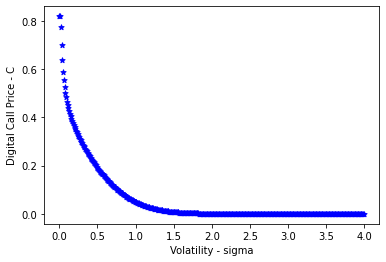

When vol is small digital call price is large, when vol big dig call price small, but flattens out after around sigma = 2 (200%IV) see graph for curvature


In [7]:
# How Black Scholes dig call varies as a function of vol
x=1
sigma_list=[]
dig_call_list=[]

# Make a list of randomly generated parameters and call price
i=0.0001
for x in range(1,1000):
    if i < 4:
        T = 10
        r= 0.02
        d= 0
        K= 110
        S = 100
        sigma = i
        sigma_list.append(sigma)

    #   Calculate price of call option and add to call list

        d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        dig_call = np.exp(-r*T)*norm.cdf(d2)
        dig_call_list.append(dig_call)
        i=i+0.01
    else:
        break


#Plot strike against call price to visually see monotone decreasing nature of graph
i=0
for i in range(0,len(sigma_list)):
    x1=[sigma_list[i]]
    y1= [dig_call_list[i]]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)

plt.xlabel('Volatility - sigma')
plt.ylabel('Digital Call Price - C')
plt.show()

print('When vol is small digital call price is large, when vol big dig call price small, but flattens out after around sigma = 2 (200%IV) see graph for curvature')


In [9]:
# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0.0001, 3, .5):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0.0001, 3, 0.05),
            y=(get_bs_call(10,0,0,100,110,(step * np.arange(0.0001, 3, .05))))))

# Make 10th trace visible
fig.data[5].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Sigma: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.46314917  2.78634714  5.70477309  8.78936805 11.92963754
 15.0833446  18.22927297 21.35443505 24.44966009 27.50780385 30.52293328
 33.48992279 36.40424146 39.26183554 42.05906124 44.79264504 47.45965952
 50.05750801 52.58391406 55.03691346 57.4148474  59.7163559  61.94037086
 64.08610858 66.15306141 68.1409885  70.04990563 71.88007414 73.63198899
 75.30636604 76.90412866 78.42639376 79.87445732 81.24977965 82.55397032
 83.78877303 84.95605049 86.05776935 87.09598542 88.07282911 88.99049134
 89.85120989 90.65725634 91.41092354 92.11451389 92.77032819 93.38065531
 93.94776268 94.47388747 94.96122868 95.41193995 95.82812324 96.21182327
 96.56502271 96.88963815 97.18751679 97.46043378 97.71009026 97.93811195]
[ 0.          2.79129952  8.79436307 15.08775713 21.3581681  27.51084077
 33.4922754 

In [10]:
def get_intrinsic_put(T,r,d,S,K,sigma):
    intrinsic = K-S
    return intrinsic

89.06786002407377
88.1039764335153
87.17387577084376
86.27700913983946
85.41160755728221
84.57565971559121
83.76720051606743
82.9844004623174
82.22558716337055
81.48924216144651
80.77398908673096
80.07857944879697
79.40187858781492
78.74285274072712
78.10055750933036
77.4741277338787
76.86276866275668
76.26574827200552
75.68239058542812
75.11206985695594
74.5542054927858
74.00825760731357
73.47372312231352
72.95013233247812
72.43704587221642
71.93405202861672
71.4407643539109
70.95681953785105
70.48187550633395
70.01560971757254
69.55771763127466
69.10791132978758
68.6659182731095
68.23148017215554
67.80435196677007
67.38430089676217
66.97110565576352
66.56455561900484
66.1644501372205
65.77059788984526
65.38281629149006
65.00093094639416
64.62477514616637
64.25418940666202
63.889021040308
63.529123760593336
63.174357315798176
62.82458714934586
62.47968408443519
62.139524030852236
61.8039877120729
61.47296041095614
61.14633173249422
60.82399538223446
60.50584895911905
60.19179376160650

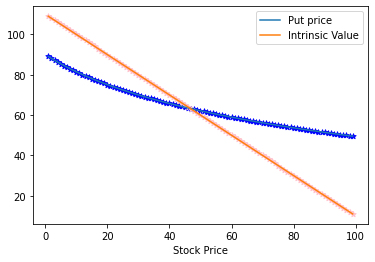

In [11]:
# BS put value and instrisic value graphed

x=1
put_list=[]
intrinsic_list=[]
stock_price_list=[]


# Make a list of randomly generated parameters and call price

for i in range(1,100):
        T = 10
        r= 0.02
        d= 0
        K= 110
        S = i
        sigma = 0.5
        stock_price_list.append(S)

    #   Calculate price of call option and add to call list

        put = get_put(T,r,d,S,K,sigma)
        put_list.append(put)
        
    # Calculate intrinsic put value
        intrinsic = get_intrinsic_put(T,r,d,S,K,sigma)
        intrinsic_list.append(intrinsic)
        i=i+5
   
# print(put_list, intrinsic_list,stock_price_list)

x1 = stock_price_list
y1 = put_list
y2 = intrinsic_list


plt.plot(x1,y1)
plt.plot(x1,y2)
plt.legend(["BS put price", "Intrinsic Value"])


#Plot strike against call price to visually see monotone decreasing nature of graph
for i in range(0,len(put_list)):
    x1=[stock_price_list[i]]
    y1= [put_list[i]]
    y2= intrinsic_list[i]
    plt.scatter(x1,y1, label = "stars", color= "blue", marker = "*", s = 30)
    plt.scatter(x1,y2, label = "stars", color= "pink", marker = "*", s = 30)

plt.xlabel( 'Stock Price')
plt.legend(['Put price','Intrinsic Value'])
# plt.xlim([0, 100])
# plt.ylim([0, 100])
plt.show()